# Bike Sharing Demand 01 - EDA & TensorFlow

### ※ 프로젝트 개요
####   
####   
### ● 워싱턴 DC 'Capital Bikeshare program'에서  '자전거 대여 수요'를 예측
### ● 자전거 공유 시스템은 회원 가입, 자전거 임대 및 반환 절차가 도시 전역의 키오스크 위치 네트워크를 통해 자동화
### ● 이 시스템에 의해 생성된 여행 시간, 출발 위치, 도착 위치, 경과 시간으로 도시의 이동성을 연구 할 수 있음 

###   
### 목표 : 데이터에 대한 EDA(탐색적 데이터 분석)을 수행하고, 텐서플로를 활용하여 수요를 예측해본다.
###   
###   

## 1. 데이터 불러오기 

In [2]:
import pandas as pd

train = pd.read_csv("./bike/train.csv", parse_dates=['datetime'])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 어떤 컬럼을 날짜로 인식   parse_dates=['datetime'] -> 'datetime'을 날짜형태로

In [2]:
test = pd.read_csv("./bike/test.csv", parse_dates=['datetime'])
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


####   
####   

## 2. 데이터 탐색

In [ ]:
# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

In [ ]:
# 날짜 시간 - 시간별 날짜 + 시간 소인
# 계절 - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
# 휴일 - 휴일로 간주되는지 여부
# 근무일 - 주말이나 휴일이 아닌지 여부
# 날씨 - 1 : 맑음, 흐림 흐림, 부분 흐림, 부분 흐림
# 2 : 안개 + 흐림, 안개 + 깨진 구름, 안개 + 약간 구름, 안개
# 3 : 밝은 눈, 밝은 비 + 뇌우 + 흩어져있는 구름, 밝은 비 + 흩어져있는 구름
# 4 : 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개
# 온도 - 섭씨 온도
# atemp - "섭씨"기온과 비슷합니다.
# 습도 - 상대 습도
# 풍속 - 풍속
# 캐주얼 - 등록되지 않은 사용자 임대가 시작된 수
# 등록 - 시작된 등록 된 사용자 대여의 수
# 집계 - 총 임대료의 수

### 1) 변수 확인

In [3]:
print(train.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [4]:
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


#### train과 test의 가장 큰 차이는 test 데이터에선 'casual(비회원)'과 registered(회원)' 변수가 없다.
#### 따라서 모델 구성 시 casual과 registered는 쓰지 않는다.

In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### 'holiday' 'working'는 0과 1만 존재하는 것으로 보임
#### 'season', 'weather'은 4개로 추정 
#### 'temp와 'atemp'는 큰 차이 없음

### 2) 변수 별 구성 값 확인

In [6]:
holiday_unique = pd.unique(train['holiday'])  
holiday_unique

array([0, 1], dtype=int64)

In [7]:
working_unique = pd.unique(train['workingday'])
working_unique

array([0, 1], dtype=int64)

In [8]:
season_unique = pd.unique(train['season'])
season_unique

array([1, 2, 3, 4], dtype=int64)

In [9]:
weather_unique = pd.unique(train['weather'])
weather_unique

array([1, 2, 3, 4], dtype=int64)

#### 'holiday' 'working'는 원핫인코딩 방식의 0(휴일이 아니다)과 1(휴일이다) 
#### 'season'은 봄(1), 여름(2), 가을(3), 겨울(4)이고 'weatehr'도 비슷한 방식으로 4가지 날씨 표현

### 3) 빈도수 확인

In [10]:
holiday_table = train['holiday'].value_counts()
holiday_table

0    10575
1      311
Name: holiday, dtype: int64

In [11]:
working_table = train['workingday'].value_counts()
working_table

1    7412
0    3474
Name: workingday, dtype: int64

In [12]:
season_table = train['season'].value_counts()
season_table

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [13]:
weather_table = train['weather'].value_counts()
weather_table

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

#### 당연하듯이 휴일 아닌 날이 훨씬 많음
#### 주말과 휴일이 아닌 날은 3474일, 주중 평일은 7412
#### 계절은 골고루 표본이 존재
#### 날씨의 경우 '1 : Clear, Few clouds, Partly cloudy, Partly cloudy'이 7192건으로 가장 많고,  
#### '2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' 이 2834건으로  많다. 
#### '3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'은 859건
#### '4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'은 1건으로 표본이 극단적으로 없다.

### 4) 결측치 확인

In [14]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [15]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

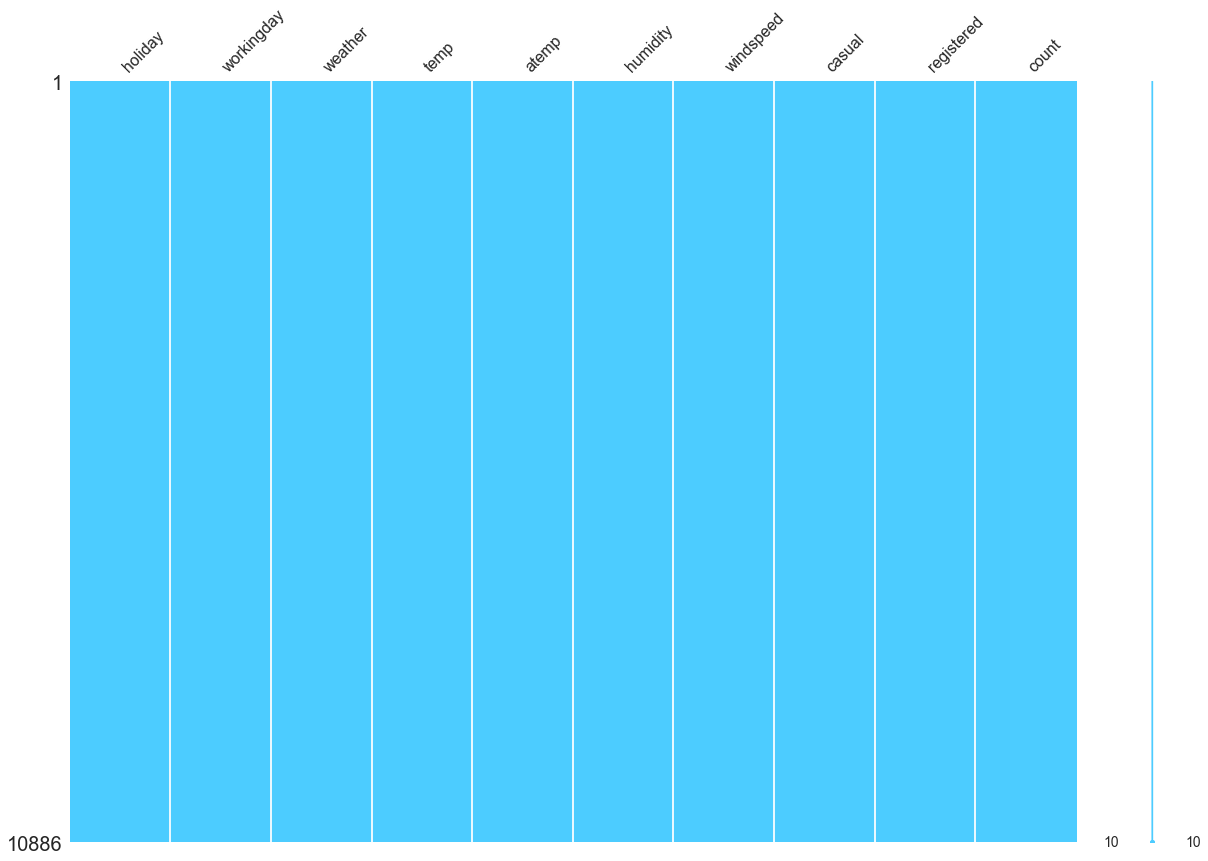

In [16]:
import numpy as np # numpy는 과학 계산을 위한 라이브러리
import missingno as msno   # 결측값을 보여주는 라이브러리 / pip install missingno로 설치해야 함.

msno.matrix(df=train.iloc[:,2:39], figsize = (20, 14), color = (0.3,0.8,1))

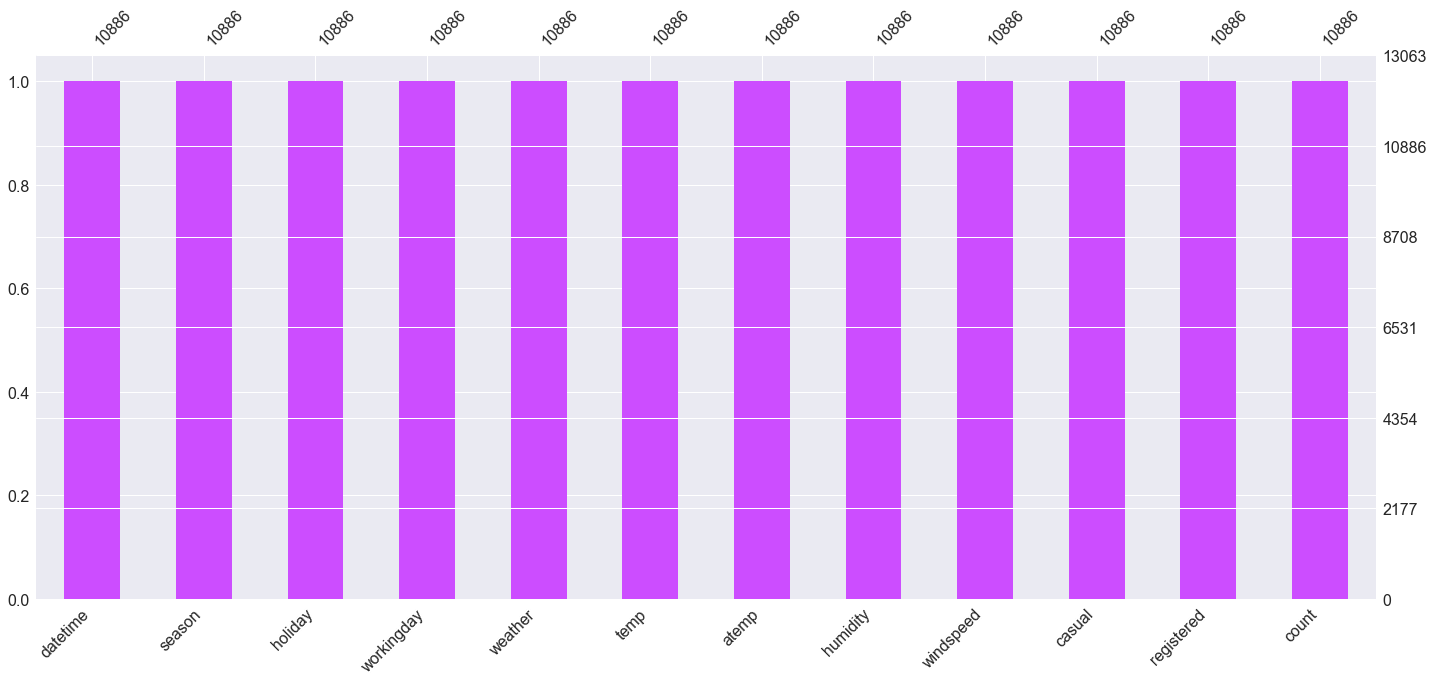

In [17]:
msno.bar(df = train, color = (0.8,0.3,1))

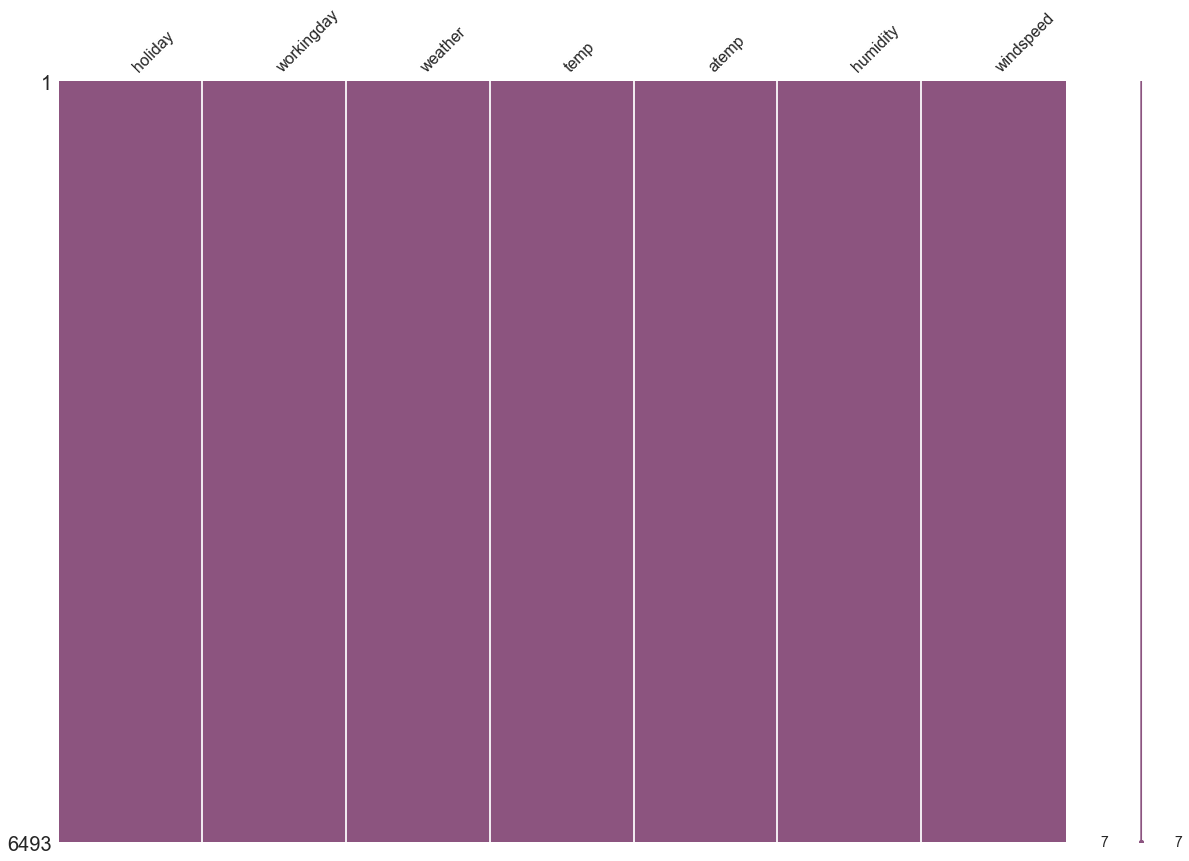

In [18]:
msno.matrix(df=test.iloc[:,2:39], figsize = (20, 14), color = (0.55,0.33,0.5))

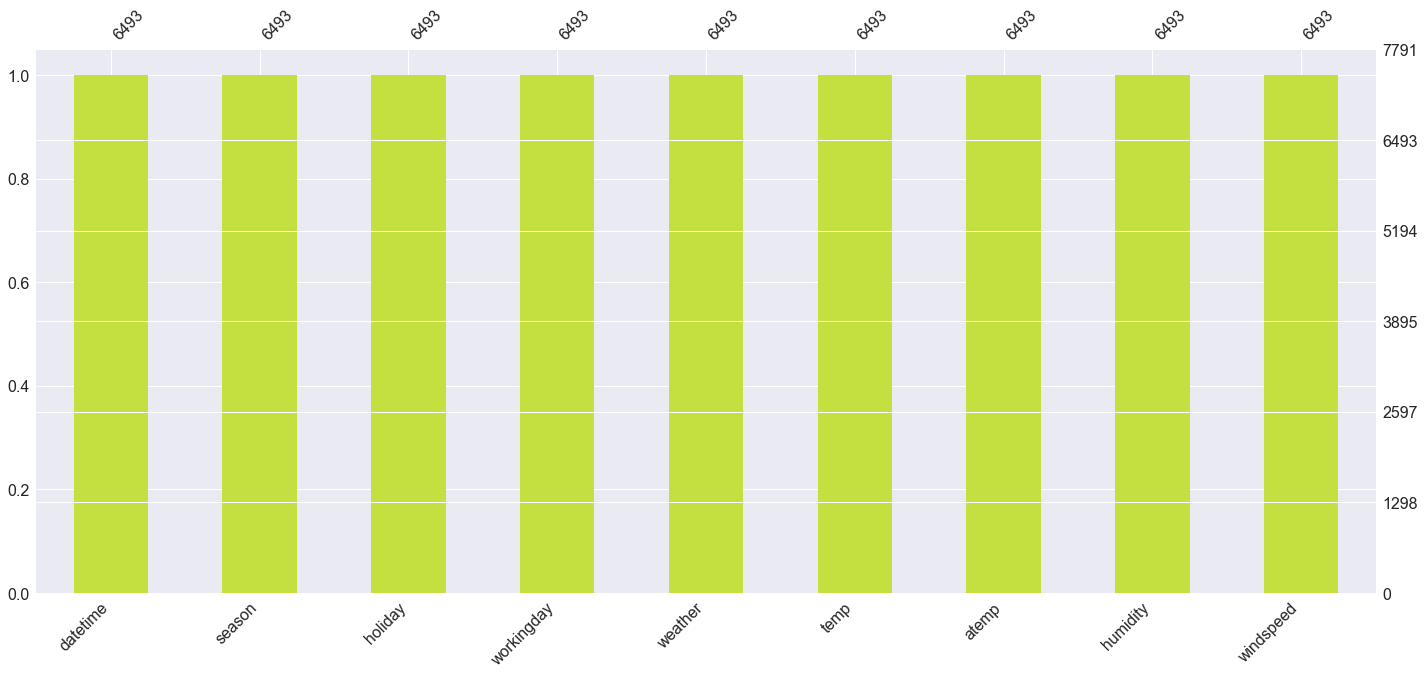

In [19]:
msno.bar(df = test, color = (0.77,0.88,0.25))

#### train과 test 데이터 모두 결측치가 존재하지 않는다.

### 5) 상관관계 확인

#### heatmap : 다양한 정보를 일정 이미지 위에 열분포 형태의 비쥬얼한 그래픽으로 출력

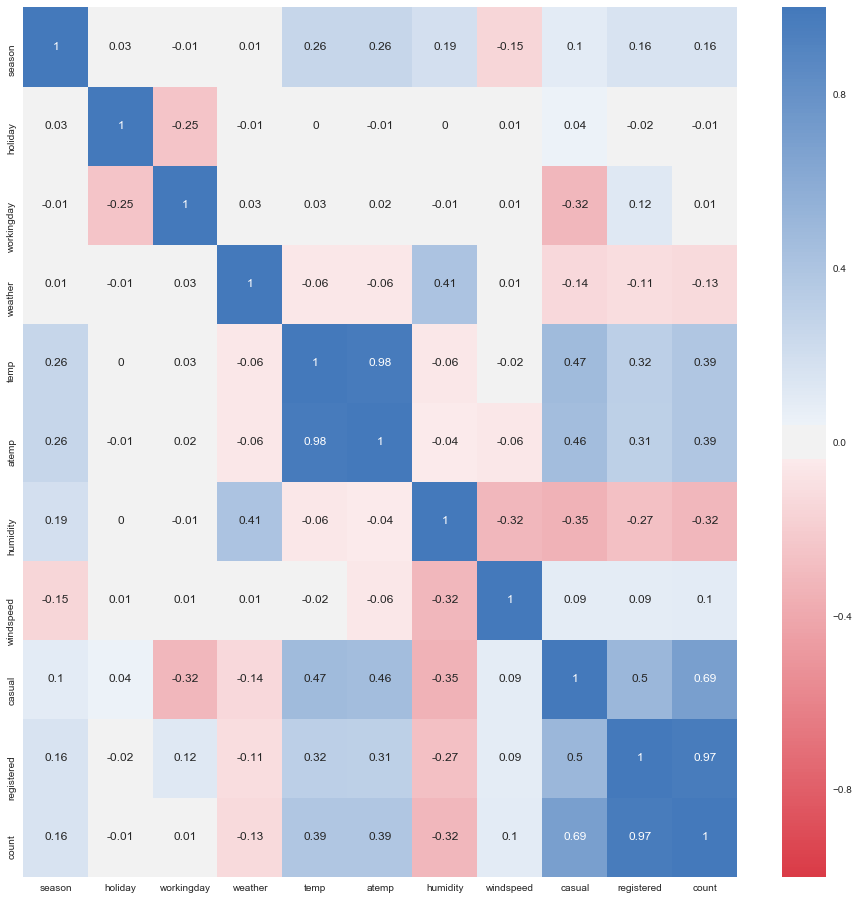

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_matrix = train.corr().round(2)

fig = plt.figure(figsize = (16, 16));
sns.heatmap(cor_matrix, annot = True, center = 0, 
            cmap = sns.diverging_palette(10, 250, as_cmap = True),
            ax = plt.subplot(111));
plt.show()

#### 목표값인 count와 가장 연계가 높은 건 회원을 뜻하는 'registered'이다.(하지만 test데이터에 없기에 사용할 수 없다)
#### 비회원인 'casual'인 비교적 높은 0.69의 상관관계가 있다.
#### 그 다음으로 가장 연관이 높은 건 기온(temp)과 체감기온(atemp)이다. 
#### 마지막으로 'season'과 'windspeed'가 상관관계를 보인다. 


#### 회원확보가 중요, 기온이 그나마 큰 영향 기온, 계절 에 따른 이벤트 등 필요

####  
####   

## 3. 데이터 변환

### 1) 파생변수 만들기 : datetime(날짜, 시간) - 연,월,일,시,분,초, 요일 나누기

In [21]:
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

#### 'datetime'변수에서(데이터를 가져올 때 날짜 형태로 변환)  'year'(년도) 데이터를 가져와 'year'에 넣기

In [22]:
train['year'] = train['datetime'].dt.year  

#### 'month', 'day','hour','minute','second'에 대해서도 마찬가지로 적용

In [23]:
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train[['year','month', 'day','hour','minute','second']].head()

,year,month,day,hour,minute,second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


#### 'dayofweek'로 요일 나누기(0~6 : 0 월요일 ~ 6 일요일)

In [24]:
train["dayofweek"] = train["datetime"].dt.dayofweek 
train[["dayofweek"]].head()

,dayofweek
0,5
1,5
2,5
3,5
4,5


#### test 데이터에도 적용

In [25]:
test['year'] = test['datetime'].dt.year  
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test["dayofweek"] = train["datetime"].dt.dayofweek 


test[['year','month', 'day','hour','minute','second', 'dayofweek']].head()

,year,month,day,hour,minute,second,dayofweek
0,2011,1,20,0,0,0,5
1,2011,1,20,1,0,0,5
2,2011,1,20,2,0,0,5
3,2011,1,20,3,0,0,5
4,2011,1,20,4,0,0,5


#### 파생변수 확인

In [26]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [27]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek'],
      dtype='object')

####   
####  

### 2) 시각화 

#### (1) 연, 월, 일, 시, 분, 초, 요일 별 'count'

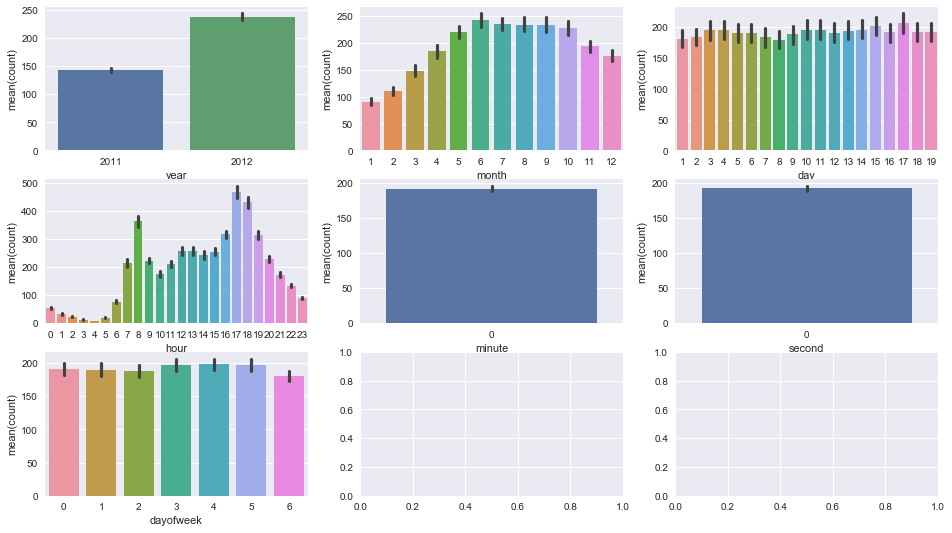

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows = 3, ncols = 3)
figure.set_size_inches(16,9)

sns.barplot(data = train, x = 'year', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'month', y = 'count', ax = ax2)
sns.barplot(data = train, x = 'day', y = 'count', ax = ax3)
sns.barplot(data = train, x = 'hour', y = 'count', ax = ax4)
sns.barplot(data = train, x = 'minute', y = 'count', ax = ax5)
sns.barplot(data = train, x = 'second', y = 'count', ax = ax6)
sns.barplot(data = train, x = 'dayofweek', y = 'count', ax = ax7)

#### 2011년 보다 2012년 사용량 증가
#### 한창 겨울인 1월에 가장 낮았다 봄, 여름 계속 증가해 6월에 최고점을 찍고 유지하다 12월로 갈수록 감소
#### 일로 보면 큰 차이 없음
#### 시간은 새벽 시간 대에는 이용량으 크게 적고 아침 출근 시간인 8시와 퇴근 시간대는 17~18시 사이에 대여량 크게 증가
#### 분과 초는 의미 없음
#### 요일도 큰 영향은 없음. 단, 일요일 대여량이 가장 적음

#### (2) 휴일, 근무일, 계절, 날씨 별 'count'

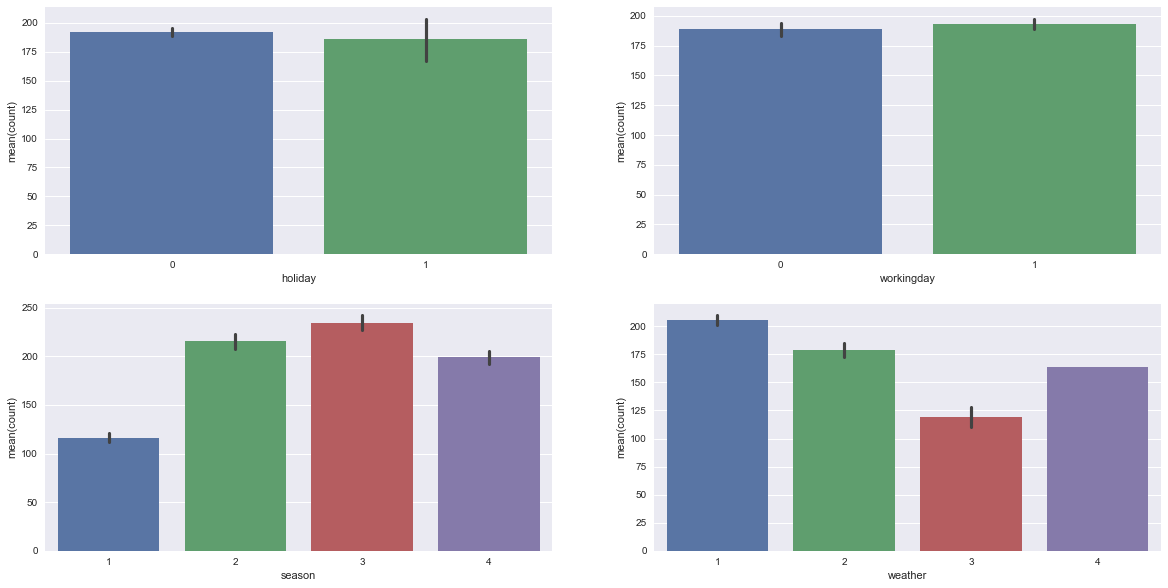

In [29]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(20,10)

sns.barplot(data = train, x = 'holiday', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'workingday', y = 'count', ax = ax2)
sns.barplot(data = train, x = 'season', y = 'count', ax = ax3)
sns.barplot(data = train, x = 'weather', y = 'count', ax = ax4)

#### holiday, workingday의 경우 큰 차이는 없음
#### season은 봄(1)에 평균 자전거 대여 횟수가 적고, 가을(3)이 많음. 봄보다 겨울에 대여가 많은 것이 특이
#### 날씨 표본은 1,2,3,4(1개) 순인데도 평균 값이 1이 매우 높음. 4의 경우 표본이 한 개라 큰 의미는 없음

#### (3) 온도, 체감온도 별  'count'

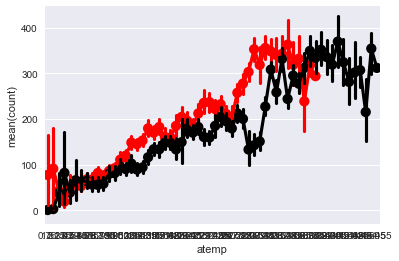

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(20, 10)})
sns.pointplot(data = train, x = 'temp', y = 'count', color = 'red', label = 'temp')
sns.pointplot(data = train, x = 'atemp', y = 'count', color = 'black', label = 'atemp')

#### 온도에 따른 대여횟수가 증가하다 어느 순간 정체된다. 

#### (4) casual, registered 별  'count'

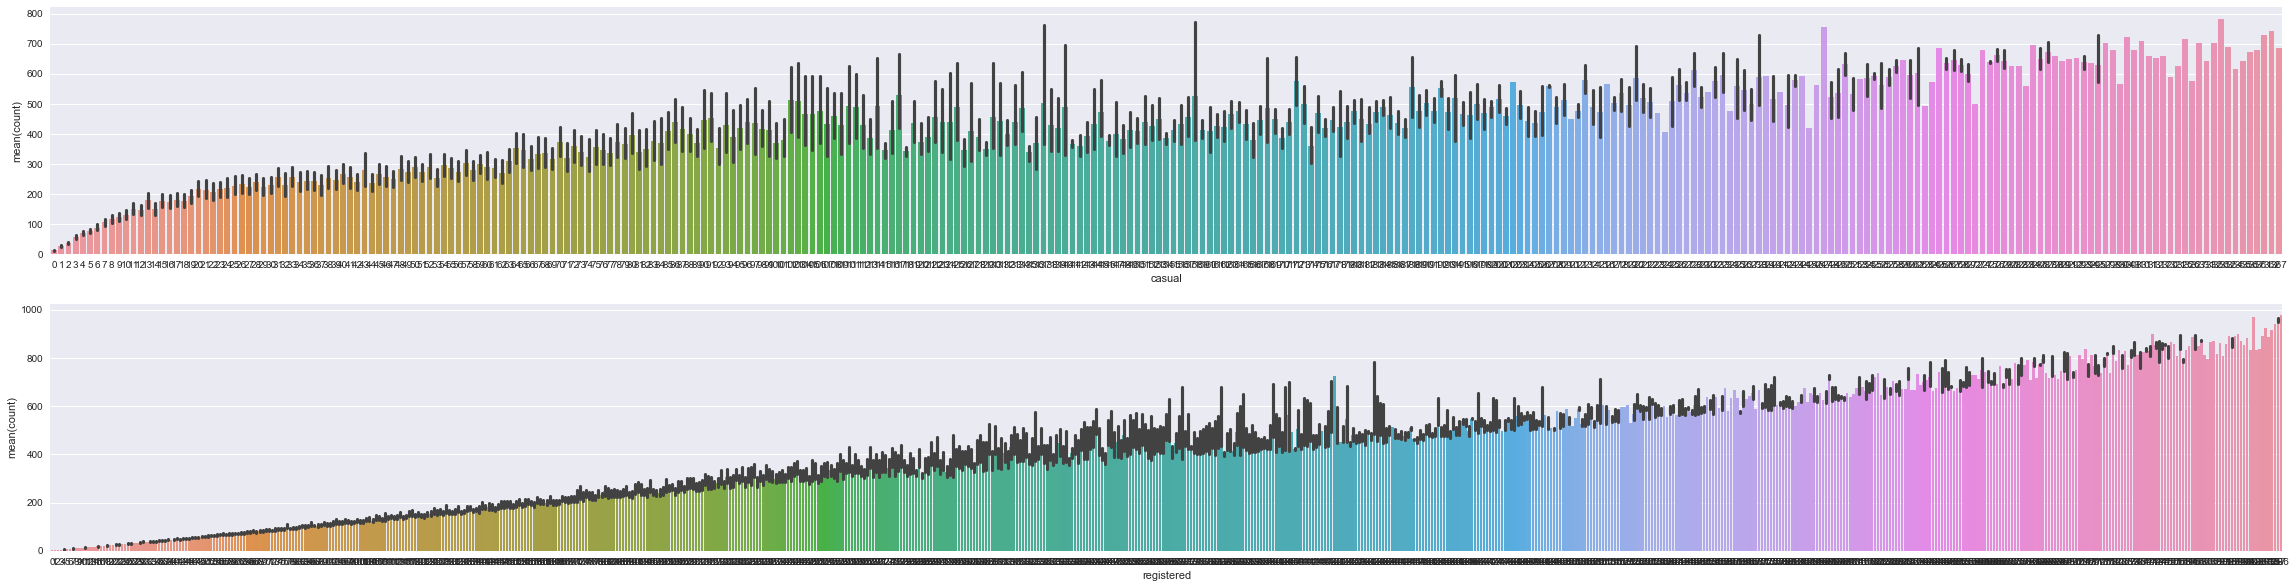

In [13]:
figure, ((ax1, ax2)) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(40,10)

sns.barplot(data = train, x = 'casual', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'registered', y = 'count', ax = ax2)

####  

### 2) 원핫 인코딩(One-Hot Encoding) : 범주형 변수를 여러 개의 가변수로 만들어 정보에 해당하면 1, 아니면 0으로 정의

#### (1) season(계절) 원핫 인코딩

#### train 데이터 원핫 인코딩

In [30]:
train["season_1"] = train["season"] == 1
train["season_2"] = train["season"] == 2
train["season_3"] = train["season"] == 3
train["season_4"] = train["season"] == 4

train[["season", "season_1", "season_2", "season_3", "season_4"]].head()

,season,season_1,season_2,season_3,season_4
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


#### test 데이터 원핫 인코딩

In [31]:
test["season_1"] = test["season"] == 1
test["season_2"] = test["season"] == 2
test["season_3"] = test["season"] == 3
test["season_4"] = test["season"] == 4

test[["season", "season_1", "season_2", "season_3", "season_4"]].head()

,season,season_1,season_2,season_3,season_4
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


####    

#### (2)  weather(날씨) 원핫 인코딩

#### train 데이터 원핫 인코딩

In [32]:
train["weather_1"] = train["weather"] == 1
train["weather_2"] = train["weather"] == 2
train["weather_3"] = train["weather"] == 3
train["weather_4"] = train["weather"] == 4

train[["weather", "weather_1", "weather_2", "weather_3", "weather_4"]].head()

,weather,weather_1,weather_2,weather_3,weather_4
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


#### test 데이터 원핫 인코딩

In [33]:
# test data 원핫인코딩

test["weather_1"] = test["weather"] == 1
test["weather_2"] = test["weather"] == 2
test["weather_3"] = test["weather"] == 3
test["weather_4"] = test["weather"] == 4

test[["weather", "weather_1", "weather_2", "weather_3", "weather_4"]].head()

,weather,weather_1,weather_2,weather_3,weather_4
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


####  

#### (3) dayofweek(요일) 원핫 인코딩

#### train 데이터 원핫 인코딩

In [34]:
train["mon"] = train["dayofweek"] == 0
train["tue"] = train["dayofweek"] == 1
train["wed"] = train["dayofweek"] == 2
train["thu"] = train["dayofweek"] == 3
train["fri"] = train["dayofweek"] == 4
train["sat"] = train["dayofweek"] == 5
train["sun"] = train["dayofweek"] == 6

train[['mon', 'tue', 'wed', 'thu', 'fri', 'sat','sun']].head()

,mon,tue,wed,thu,fri,sat,sun
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False


#### test 데이터 원핫 인코딩

In [35]:
test["mon"] = test["dayofweek"] == 0
test["tue"] = test["dayofweek"] == 1
test["wed"] = test["dayofweek"] == 2
test["thu"] = test["dayofweek"] == 3
test["fri"] = test["dayofweek"] == 4
test["sat"] = test["dayofweek"] == 5
test["sun"] = test["dayofweek"] == 6

test[['mon', 'tue', 'wed', 'thu', 'fri', 'sat','sun']].head()

,mon,tue,wed,thu,fri,sat,sun
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False


#### (4) hour(시간) 원핫 인코딩

#### train, test 데이터 원핫 인코딩 : 0시 ~ 23시

In [36]:
train["12 am"] = train["hour"] == 0 
test["12 am"] = test["hour"] == 0 

train["1 am"] = train["hour"] == 1
test["1 am"] = test["hour"] == 1 

train["2 am"] = train["hour"] == 2 
test["2 am"] = test["hour"] == 2 

train["3 am"] = train["hour"] == 3 
test["3 am"] = test["hour"] == 3 

train["4 am"] = train["hour"] == 4 
test["4 am"] = test["hour"] == 4 

train["5 am"] = train["hour"] == 5 
test["5 am"] = test["hour"] == 5 

train["6 am"] = train["hour"] == 6 
test["6 am"] = test["hour"] == 6 

train["7 am"] = train["hour"] == 7 
test["7 am"] = test["hour"] == 7 

train["8 am"] = train["hour"] == 8 
test["8 am"] = test["hour"] == 8

train["9 am"] = train["hour"] == 9 
test["9 am"] = test["hour"] == 9 

train["10 am"] = train["hour"] == 10 
test["10 am"] = test["hour"] == 10 

train["11 am"] = train["hour"] == 11 
test["11 am"] = test["hour"] == 11 

train["12 pm"] = train["hour"] == 12 
test["12 pm"] = test["hour"] == 12

train["1 pm"] = train["hour"] == 13 
test["1 pm"] = test["hour"] == 13 

train["2 pm"] = train["hour"] == 14 
test["2 pm"] = test["hour"] == 14 

train["3 pm"] = train["hour"] == 15 
test["3 pm"] = test["hour"] == 15

train["4 pm"] = train["hour"] == 16 
test["4 pm"] = test["hour"] == 16

train["5 pm"] = train["hour"] == 17 
test["5 pm"] = test["hour"] == 17

train["6 pm"] = train["hour"] == 18
test["6 pm"] = test["hour"] == 18

train["7 pm"] = train["hour"] == 19 
test["7 pm"] = test["hour"] == 19

train["8 pm"] = train["hour"] == 20
test["8 pm"] = test["hour"] == 20

train["9 pm"] = train["hour"] == 21
test["9 pm"] = test["hour"] == 21

train["10 pm"] = train["hour"] == 22
test["10 pm"] = test["hour"] == 22

train["11 pm"] = train["hour"] == 23
test["11 pm"] = test["hour"] == 23

In [37]:
train[['12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
       '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm' ]].head()

,12 am,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,...,2 pm,3 pm,4 pm,5 pm,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
test[['12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
       '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm' ]].head()

,12 am,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,...,2 pm,3 pm,4 pm,5 pm,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


####   
####  

## 4. 변수 선택

In [39]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'mon', 'tue', 'wed', 'thu',
       'fri', 'sat', 'sun', '12 am', '1 am', '2 am', '3 am', '4 am', '5 am',
       '6 am', '7 am', '8 am', '9 am', '10 am', '11 am', '12 pm', '1 pm',
       '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm',
       '11 pm'],
      dtype='object')

In [40]:
train.shape

(10886, 58)

#### 기본 변수 9개(test 데이터에 없는 casual과 registered는 제외)

In [41]:
feature_names = ['datetime', 'season', 'holiday', 'workingday', 'weather',
                  'temp', 'atemp', 'humidity', 'windspeed']

#### 파생변수, 원핫 인코딩 변수(아래 변수들을 쓸 때 겹치는 기본 변수는 제외)

In [ ]:
# datetime -  'year', 'month', 'day', 'hour', 'minute', 'second'
# season   -  'season_1', 'season_2', 'season_3', 'season_4'
# weather  -  'weather_1', 'weather_2', 'weather_3', 'weather_4'
# day      -  'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'
# days     -  'dayofweek'
# hour     - '12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am',
#            '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm'

#### 여기서부터 변수 선택해가며 모델 돌리기

##### (1) 변수선택 

In [42]:
feature_names = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
                 'year', 'month', 'day', 'hour', 'minute', 'second',
                 'season_1', 'season_2', 'season_3', 'season_4',
                 'weather_1', 'weather_2', 'weather_3', 'weather_4',
                 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',
                 '12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am', 
                 '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm',
                 ]

#### 학습시킬 데이터

In [43]:
x_train = train[feature_names]

#### 학습 시 사용하는 값 :  'count'(자전거 대여)

In [44]:
y_train = train['count']

#### 모델 생성 후 위와 다른  'count'값을 예측하기 위한 학습 데이터 : 여기서 나온 count 값을 케글에 제출

In [45]:
x_test = test[feature_names]

####    
####  

 ## 5. TensorFlow - DNN(Deep Neural Network)

### 1) Pandas DataFrame을 TensorFlow의 Tensor로 변환하기

#### (1) log & exp

#### log는 큰 수를 같은 비율의 작은 수로 바꿔주어 복잡한 계산을 간편하게 해주는 역할을 한다. 
#### bike sharing demand에서도 구하고자 하는 'count' 값에 log를 씌어 계산한 뒤 다시 풀어준다.
#### 모델 평가 방식이 RMSLE로 log를 사용하기 때문에도 쓴다.
#### 최종적으로 값에 log함수(log)를 써서 모델을 만든 뒤, test 데이터로 예측을 한고 나온 결과값을 exp함수(지수함수)를 써서 풀어준다.

In [46]:
y_train = np.log1p(y_train)  # == np.log(y_train + 1)
print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

#### 1을 더하고 log를 취하는 이유는 0인 경우 y가 -무한대의 값을 가지기 때문에 0을 1로 바꿔준다.  

####  np.expm1(predictions) = = np.exp(predictions) - 1   은 test값을 예측하고 나온 결과값에 해준다.

#### (2) Data Type 변환

#### x_train, x_test 데이터의 타입에 object 등이 있어 텐서플로에서 사용하는 float32 로 변환

In [47]:
x_train = x_train.astype('float32')

x_test  = x_test.astype('float32')

#### numpy 사용 버전

In [48]:
import numpy as np

x_train_1 = np.array(x_train, dtype=np.float32)
x_train_1.shape

(10886, 51)

In [49]:
y_train_1 = np.array(y_train, dtype=np.float32)
y_train_1.shape

(10886,)

In [50]:
x_test_1 = np.array(x_test, dtype=np.float32)
x_test_1.shape

(6493, 51)

#### y_train의 경우 [10886, 1] 형태로 만들어주어야 한다. 그래서 모두 다시 reshape을 해준다.

In [51]:
x_train_1 = x_train_1.reshape(10886, 51)
y_train_1 = y_train_1.reshape(10886, 1)
x_test_1 = x_test_1.reshape(6493, 51)

In [52]:
x_train_1.shape

(10886, 51)

In [53]:
y_train_1.shape

(10886, 1)

In [54]:
x_test_1.shape

(6493, 51)

#### 데이터 구조 보기 

In [55]:
x_train_1

array([[  0.        ,   0.        ,   9.84000015, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   9.02000046, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   9.02000046, ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   1.        ,  13.93999958, ...,   1.        ,
          0.        ,   0.        ],
       [  0.        ,   1.        ,  13.93999958, ...,   0.        ,
          1.        ,   0.        ],
       [  0.        ,   1.        ,  13.11999989, ...,   0.        ,
          0.        ,   1.        ]], dtype=float32)

In [56]:
y_train_1

array([[ 2.83321333],
       [ 3.71357203],
       [ 3.49650764],
       ..., 
       [ 5.12989855],
       [ 4.86753464],
       [ 4.48863649]], dtype=float32)

In [57]:
x_test_1

array([[  0.        ,   1.        ,  10.65999985, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   1.        ,  10.65999985, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   1.        ,  10.65999985, ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   1.        ,  10.65999985, ...,   1.        ,
          0.        ,   0.        ],
       [  0.        ,   1.        ,  10.65999985, ...,   0.        ,
          1.        ,   0.        ],
       [  0.        ,   1.        ,  10.65999985, ...,   0.        ,
          0.        ,   1.        ]], dtype=float32)

### (2) TensorFlow 실행하기

#### 설치는 Anaconda Prompt 실행 후 ' pip3 install --upgrade tensorflow ' 혹은 ' pip3 install --upgrade tensorflow-gpu '

In [58]:
import tensorflow as tf

hello = tf.constant('hello, tensorflow!')
print(hello)

Tensor("Const:0", shape=(), dtype=string)


#### tensor로 변환하는 코드

In [59]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    tf_train = tf.constant(x_train_1)
    print(tf_train.eval())


[[  0.           0.           9.84000015 ...,   0.           0.           0.        ]
 [  0.           0.           9.02000046 ...,   0.           0.           0.        ]
 [  0.           0.           9.02000046 ...,   0.           0.           0.        ]
 ..., 
 [  0.           1.          13.93999958 ...,   1.           0.           0.        ]
 [  0.           1.          13.93999958 ...,   0.           1.           0.        ]
 [  0.           1.          13.11999989 ...,   0.           0.           1.        ]]


## (3) TensorFlow - DNN 활용 

### 1) 신경망 모델 구성

#### (1) 입출력 정의
####   
#### X는 입력데이터로 들어갈 건 x_train (10886, 51) 행렬 형태의 구조를 가지고 있다.
#### 추후 모델에 넣을 데이터(rows) 행은 None으로 두고, 정해져 있는 변수(columns)들 열은  
#### Y는 출력데이터로 여기선 구하고자 하는 'count'값 이기에 (10886, 1) 행렬 형태의 구조를 가지고 있다.
#### 드롭아웃 기법 사용 시, 학습이 끝난 뒤 예측 할 때 신경망 전체를 사용하도록 해야 함. 따라서 'keep_prob'이란 플레이스 홀더를 따로 만듬

In [60]:
X = tf.placeholder(tf.float32, [None, 51]) # 51
Y = tf.placeholder(tf.float32, [None, 1])  # 1
keep_prob = tf.placeholder(tf.float32)

#### (2) 은닉층 구성 - 가중치 및 손실함수 드랍아웃
####   
#### 가중치 W, 편항 b, 활성화 함수 relu, 과적합 방지 dropout
#### X가 [None, 51] 형태이니 [None, 51] X [???, ???] 행렬곱이 되는   [None, 51] X [51 ,256] 설정. 여기서 256은 첫 번째 은닉층 뉴런 개수
#### 마찬가지로 W2의 경우도 [None, 256]과 행렬곱을 위해 [256, 256]을 선택. 두 번째 은닉층 뉴런 개수는 256
#### 마지막으로 W3는 결과값인 'count'가 하나의 회귀값이므로 [256, 1]을 선택

#### 편향은 일단 zeros 사용. 근데 random_uniform일 수도 있음.  레이블을 구하는 분류가 아닌 회귀이니 가중치와 똑같을 수도 있음
#### b는 W의 열의 갯수인 뉴런의 갯수와 맞춰준다. 

#### 나온 결과값에 활성화 함수인 relu 적용

#### 과적합 방지를 위해 dropout을 해주는 데 dropout은 학습 시 전체 신경망 중 일부만을 사용하도록 해 일부 특징이 특정 뉴런에 고정되는 것을 막아
#### 가중치의 균형을 잡도록 해 과적합을 방지. 여기서 keep_prob은 사용할 뉴런의 비율인데 이것은 추후에 설정해준다.(feed_dict)

#### random_uniform 균등분포로부터의 난수값을 반환
#### random_normal  정규분포로부터의 난수값을 반환  (stddev = 0.01 존재)
####    
#### 위 둘 중 어느 것을 써야할까?

In [61]:
W1 = tf.Variable(tf.random_normal([51 ,256], stddev = 0.01))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.dropout(L1, keep_prob)


W2 = tf.Variable(tf.random_normal([256, 256], stddev = 0.01))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.add(tf.matmul(L1, W2), b2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 1], stddev = 0.01))
b3 = tf.Variable(tf.random_normal([1]))
model = tf.add(tf.matmul(L2, W3), b3)

#### 위 코드 성공

#### 가중치 없는 버전

In [ ]:
W1 = tf.Variable(tf.random_uniform([51 ,256], stddev=0.01))
b1 = tf.Variable(tf.zeros([256]))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)


W2 = tf.Variable(tf.random_uniform([256, 256], stddev=0.01))
b2 = tf.Variable(tf.zeros([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_uniform([256, 1], stddev=0.01))
model = tf.matmul(L2, W3)

####  

#### (3) 손실함수 및 최적화


#### 손실함수를 어떻게 정의하느냐가 모델에서 많이 중요하다.
#### 아래 model은 예측한 값 Y는 실제 값

#### tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
#### tf.sqrt(tf.subtract(tf.log(tf.add(model, 1)), tf.log(tf.add(Y, 1)))) - RMSLE 구현
#### tf.reduce_sum(tf.sqrt(model - Y))
#### tf.losses.mean_squared_error(model, Y)    
#### tf.sqrt(tf.reduce_mean(tf.squared_difference(model, Y))) 

#### 위 손실함수는 값이 너무 크거나 혹은 작고 혹은 nan이라고 나오지 않았다.
#### tf.reduce_mean(tf.square(model - Y)) 이 여러 손실함수를 써본 결과 제대로 된 값이 나왔다. 

In [64]:
cost = tf.reduce_mean(tf.square(model - Y))

#### 최적화 함수 AdamOptimizer

In [65]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#### (4) 기본 세션 열기

In [5]:
init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

#### ※ GPU 메모리 할당문제 해결 

In [66]:
init = tf.global_variables_initializer()

# Blas GEMM launch failed : GPU 메모리 할당 문제 아래와 같이 GPU옵션 설정해 주고, session 열기
# per_process_gpu_memory_fraction은 GPU 메모리를 얼마만큼 사용 하느냐. ex) 0.4 = 40% 
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

sess.run(init)

#### (5) 학습 코드 

#### 미니배치 미사용

In [78]:
import time
start = time.time()

for epoch in range(1000000):
    sess.run(optimizer, feed_dict = {X : x_train_1, Y: y_train_1, keep_prob : 0.8})
    
    if (epoch+1) % 100000 == 0:
        print(epoch + 1/100000,"만 번", sess.run(cost, feed_dict = {X : x_train_1, Y: y_train_1, keep_prob : 0.8}))

    
print('최적화 완료!')

print("")
print("") 

prediction = model # 1은 axis = 1 줄인 것.
target = Y

print('예측값 : ', sess.run(prediction, feed_dict = {X : x_train_1, Y: y_train_1, keep_prob : 0.8}))  # 데이터가 안들어 감
print('실제값 : ', sess.run(target, feed_dict = {X : x_train_1, Y: y_train_1, keep_prob : 0.8}))
print("")

is_correct = tf.equal(prediction, target)
accuarcy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print("정확도 : %.2f" % sess.run(accuarcy * 100, feed_dict = {X : x_train_1, Y : y_train_1, keep_prob : 0.8}))
print("")
print("완료")
print("")
print('Running Time : %.02f초' % (time.time() - start))

99999.0001 만 번 0.196894
199999.0001 만 번 0.192936
299999.0001 만 번 0.191858
399999.0001 만 번 0.191863
499999.0001 만 번 0.190096
599999.0001 만 번 0.194841
699999.0001 만 번 0.192998
799999.0001 만 번 0.190996
899999.0001 만 번 0.193917
999999.0001 만 번 0.190861
최적화 완료!


예측값 :  [[ 3.70299649]
 [ 3.53232503]
 [ 3.17444634]
 ..., 
 [ 5.09501362]
 [ 5.03541946]
 [ 4.30635881]]
실제값 :  [[ 2.83321333]
 [ 3.71357203]
 [ 3.49650764]
 ..., 
 [ 5.12989855]
 [ 4.86753464]
 [ 4.48863649]]

정확도 : 0.00

완료

Running Time : 17653.41초


### 2) 완성된 모델로 예측

In [80]:
predictions = sess.run(model, feed_dict = {X : x_test_1, keep_prob : 0.8})
print(predictions.shape)

(6493, 1)


#### 모델 생성 전 로그함수를 취했으니, 이번엔 결과값에 지수함수를 취해준다.

In [81]:
predictions = np.expm1(predictions) ## == np.exp(predictions) - 1 
predictions

array([[ 47.29584503],
       [ 23.70961952],
       [  6.14863491],
       ..., 
       [ 73.72848511],
       [ 83.85502625],
       [ 58.93720627]], dtype=float32)

### 3) 결과 제출 

In [82]:
submission = pd.read_csv("./bike/sampleSubmission.csv")
submission["count"] = predictions
submission.to_csv("tf100.csv", index=False)

####   
####   

### 4) 결과 보고서 

#### (1) 은닉층 세 개 구성 - tf.reduce_mean(tf.square(model - Y)) -- train.AdamOptimizer(0.001) - 10 만 번

In [ ]:
[None, 51] / [51, 256] / [256, 256] / [256, 1]  keep_prob : 0.8

#### 결과는 -값이 나와서 실패

In [ ]:
10000 4217.03
20000 3463.99
30000 3153.79
40000 2705.19
50000 2557.23
60000 2429.74
70000 2141.19
80000 2138.24
90000 2014.05
100000 2006.49

#### (2) 은닉층 세 개 구성 - tf.reduce_mean(tf.square(model - Y)) -- train.AdamOptimizer(0.001) - 5 만 번 + log/exp

In [ ]:
[None, 51] / [51, 256] / [256, 256] / [256, 1]  keep_prob : 0.8

#### 학습하기 전 결과값 y_train에 logx+1과 학습 후 예측 한 뒤 expx-1을 해줌
#### 결과 : 0.74791. 제대로 된 결과가 나옴. cost 값이 확실히 더 낮아짐

In [ ]:
10000 0.21916
20000 0.155146
30000 0.147403
40000 0.145585
50000 0.142374

#### (3) 은닉층 세 개 구성 - tf.reduce_mean(tf.square(model - Y)) -- train.AdamOptimizer(0.001) - 10 만 번 + log/exp

In [ ]:
[None, 51] / [51, 256] / [256, 256] / [256, 1]  keep_prob : 0.8

#### 결과 : 0.73902  결과값은 살짝 떨어짐. 10만 번으로 해도 오차율이 0.1 이하로 떨어지질 않음

In [ ]:
10000 0.238223
20000 0.21098
30000 0.207716
40000 0.195318
50000 0.198497
60000 0.196573
70000 0.200909
80000 0.209359
90000 0.197056
100000 0.195408

#### (4) 은닉층 세 개 구성 - tf.reduce_mean(tf.square(model - Y)) -- train.AdamOptimizer(0.001) - 100 만 번 + log/exp

In [ ]:
[None, 51] / [51, 256] / [256, 256] / [256, 1]  keep_prob : 0.8

#### 결과 : 0.71249 마찬가지로 결과값은 살짝만 떨어짐. 큰 변화가 없음. 오차율도 크게 낮아지지 않음

In [ ]:
10 만 번 0.196894
20 만 번 0.192936
30 만 번 0.191858
40 만 번 0.191863
50 만 번 0.190096
60 만 번 0.194841
70 만 번 0.192998
80 만 번 0.190996
90 만 번 0.193917
100 만 번 0.190861

####   
####   

 ## 6. Bike Sharing Demand 분석결론

### 1) 데이터 탐색 분석 분야

#### ◎ 대여수를 늘리기 위해선 가장 상관관계가 높은 registered(회원) 인원을 늘려야 한다. 
#### ◎ 겨울에 대여수가 떨어지는 것은 어쩔 수 없겠으나 비교적 따뜻한 3,4월은 대여수를 늘릴 여지가 있다.
#### ◎ 시간 별로 보면 9 ~ 16시까지 대여수가 낮다. 이 시간을 공략할 프로모션이 필요하다.
#### ◎ 요일은 예상외로 큰 차이가 없다. 다만 주말인 토요일 대여수가 살짝 작다. 이 부분에 대한 프로모션도 필요하다.
#### ◎ 날씨는 예상대로 안 좋을 수록 대여수가 줄어든다. 작은 비에는 탈 수 있게 우비 대여 서비스, 맞춤형 자전거 타이어 장착 등을  고려하는 것을 추천한다.
#### ◎ 하지만 계절에선 봄이 겨울보다 대여 횟수가 적다. 이 부분에 대한 원인 분석이 좀 더 필요하다. 왜냐하면 보통 봄도 가을과 같이 날씨가 좋기 때문이다. 봄이 가장 대여횟수가 적은 이유를 찾아야 한다.
#### ◎ 온도의 경우 높을수록 여유 자전거를 더 준비해놓아야 한다.


### 2) 데이터 예측 모델 분석 분야

#### ◎ 큰 수를 줄여줘서 계산할 수 있는 log와 exp과정이 필요하다.
#### ◎ DNN에서 가장 중요한 것은 cost(손실함수)를 어떻게 계산하는냐이다. 손실함수를 잘못 계산하면 값이 말도 안되게 크거나 작고 혹은 NAN값이 나온다.
#### ◎ 학습은 많을 수록 좋지만 100만 번 돌렸을 시, 모델의 성능이 드라마틱하게 좋아지진 않는다.
#### ◎ 추후 은닉층의 개수를 늘리거나 다른 손실함수를 사용하여 예측 모델 분석을 계속 진행하겠음.

####  
####  